## analyze transfer

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
HOME = "/home/gridsan/jcho/1.041-1.200-CP3-2024S"
HOME = "/Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S"

## variants: speed

In [8]:
DATA = "intersection_speed"

In [9]:
var_list = range(5,25)
reward_array = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        average_reward = 100
        for trial in range(2):
            output_path = f"{HOME}/results/intersection_flow1000_lane4.0_length750_speed{var_list[i]:.1f}_left0.25/transfer/intersection_flow1000_lane4.0_length750_speed{var_list[j]:.1f}_left0.25/transfer_results_{trial+1}.csv"
            if os.path.exists(output_path):
                reward_df = pd.read_csv(output_path)
                average_reward = min(reward_df['avg_waiting'].mean(), average_reward)
            else:
                print(f"Couldn't find the path: {output_path}")
        reward_array[i][j] = average_reward
reward_array

array([[3.81392593, 3.7536037 , 3.72013333, 3.70630741, 3.71221481,
        3.6961963 , 3.68518889, 3.53937778, 3.51001852, 3.53069259,
        3.51689259, 3.48107037, 3.45781111, 3.46684444, 3.43590741,
        3.37440741, 3.43581481, 3.46803704, 3.43957037, 3.30014815],
       [3.94781481, 3.76498519, 3.70895556, 3.65165556, 3.64392593,
        3.61808519, 3.53987037, 3.41223333, 3.4763    , 3.49377778,
        3.51004074, 3.53451852, 3.4833    , 3.35549259, 3.43602222,
        3.35073704, 3.42420741, 3.33425185, 3.25708889, 3.38495926],
       [3.91993333, 3.73938519, 3.63912593, 3.49106667, 3.54777037,
        3.41981852, 3.48897778, 3.35047778, 3.37249259, 3.3872    ,
        3.36898519, 3.32231852, 3.25711852, 3.35344815, 3.30663704,
        3.20997778, 3.19191111, 3.2226963 , 3.14962593, 3.12394444],
       [3.91088148, 3.58304074, 3.58185926, 3.44649259, 3.53665926,
        3.46302963, 3.43860741, 3.30986296, 3.41585926, 3.38729259,
        3.35754074, 3.38226667, 3.22371852, 3

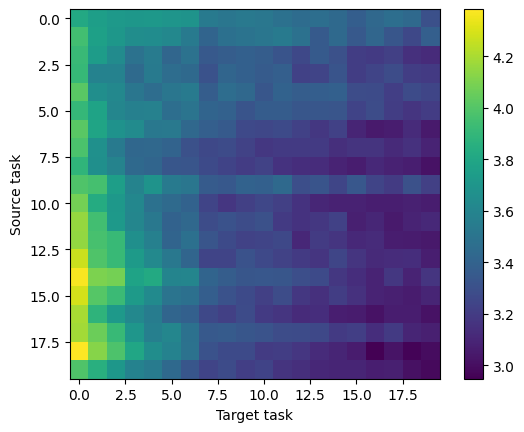

In [10]:
plt.imshow(reward_array, interpolation='none')
plt.colorbar(orientation='vertical')
plt.xlabel("Target task")
plt.ylabel("Source task")
plt.savefig(HOME+'/data/transfer_heatmap_'+DATA+'.png', bbox_inches="tight")

In [11]:
print(f"Train from scratch (in-distribution): {np.diag(reward_array).mean():.4f}")
print(f"Oracle training: {reward_array.min(axis=0).mean():.4f}")

Train from scratch (in-distribution): 3.3065
Oracle training: 3.2314


In [82]:
np.savetxt(HOME+'/data/'+DATA+'.csv', reward_array, delimiter=',')

## variants: flow

In [12]:
DATA = "intersection_flow"

In [13]:
var_list = range(100,2100,100)
reward_array = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        average_reward = 100
        for trial in range(2):
            output_path = f"{HOME}/results/intersection_flow{var_list[i]}_lane4.0_length750_speed13.89_left0.25/transfer/intersection_flow{var_list[j]}_lane4.0_length750_speed13.89_left0.25/transfer_results_{trial+1}.csv"
            if os.path.exists(output_path):
                reward_df = pd.read_csv(output_path)
                average_reward = min(reward_df['avg_waiting'].mean(), average_reward)
            else:
                print(f"Couldn't find the path: {output_path}")
        reward_array[i][j] = average_reward
reward_array

Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length750_speed13.89_left0.25/transfer/intersection_flow100_lane4.0_length750_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length750_speed13.89_left0.25/transfer/intersection_flow200_lane4.0_length750_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length750_speed13.89_left0.25/transfer/intersection_flow300_lane4.0_length750_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length750_speed13.89_left0.25/transfer/intersection_flow400_lane4.0_length750_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/resu

array([[  0.16297037,   0.52221852,   1.29902963,   2.4847    ,
          4.20996296,   5.05148889,   9.18105185,  20.41167407,
         18.9824    ,  38.7464    , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ],
       [  0.13411111,   0.37952222,   0.69312963,   1.0082963 ,
          1.37102222,   1.75088519,   2.22736296,   2.80758889,
          3.23226667,   3.81718519,   4.65573704,   7.03101111,
         10.38837407,  16.69262963,  19.70122593,  48.71555926,
         84.11401852, 100.        , 100.        , 100.        ],
       [  0.1583963 ,   0.36976667,   0.65591481,   0.98385185,
          1.26871111,   1.61148148,   2.03091111,   2.46358889,
          2.93357037,   3.47023704,   4.41784444,   6.42137407,
          9.61162222,  13.54604444, 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ],
       [  0.13807407,   0.37002593,  

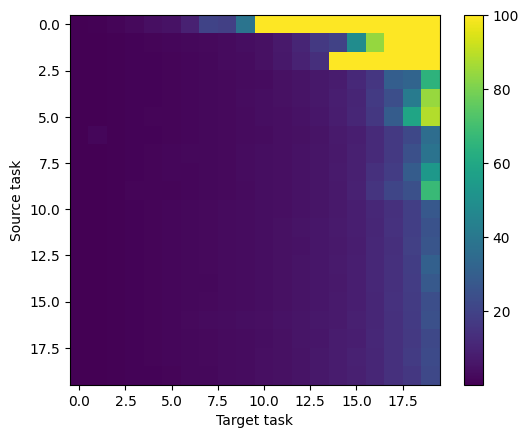

In [14]:
plt.imshow(reward_array, interpolation='none')
plt.colorbar(orientation='vertical')
plt.xlabel("Target task")
plt.ylabel("Source task")
plt.savefig(HOME+'/data/transfer_heatmap_'+DATA+'.png', bbox_inches="tight")

In [15]:
print(f"Train from scratch (in-distribution): {np.diag(reward_array).mean():.4f}")
print(f"Oracle training: {reward_array.min(axis=0).mean():.4f}")

Train from scratch (in-distribution): 5.7422
Oracle training: 5.5261


In [16]:
np.savetxt(HOME+'/data/'+DATA+'.csv', reward_array, delimiter=',')

## variants: length

In [17]:
DATA = "intersection_length"

In [18]:
var_list = range(50,1050,50)
reward_array = np.zeros((len(var_list), len(var_list)))
for i in range(len(var_list)):
    for j in range(len(var_list)):
        average_reward = 100
        for trial in range(2):
            output_path = f"{HOME}/results/intersection_flow1000_lane4.0_length{var_list[i]:.1f}_speed13.89_left0.25/transfer/intersection_flow1000_lane4.0_length{var_list[j]:.1f}_speed13.89_left0.25/transfer_results_{trial+1}.csv"
            if os.path.exists(output_path):
                reward_df = pd.read_csv(output_path)
                average_reward = min(reward_df['avg_waiting'].mean(), average_reward)
            else:
                print(f"Couldn't find the path: {output_path}")
        reward_array[i][j] = average_reward
reward_array

Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length50.0_speed13.89_left0.25/transfer/intersection_flow1000_lane4.0_length50.0_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length50.0_speed13.89_left0.25/transfer/intersection_flow1000_lane4.0_length100.0_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length50.0_speed13.89_left0.25/transfer/intersection_flow1000_lane4.0_length150.0_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200-CP3-2024S/results/intersection_flow1000_lane4.0_length50.0_speed13.89_left0.25/transfer/intersection_flow1000_lane4.0_length200.0_speed13.89_left0.25/transfer_results_2.csv
Couldn't find the path: /Users/jhcho/Pangyo/wulab/1.041-1.200

array([[100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ],
       [100.        ,   3.59842593,  33.8958963 ,  32.17438889,
         78.34234444, 100.        ,  54.00374074,  82.66361481,
         68.6217963 ,  41.8658963 ,  51.60458519,  25.4844    ,
         28.86891481,  28.15752963,  30.04593704,  36.45431481,
         25.42201111,  35.90804815,  38.36929259,  40.93579259],
       [100.        , 100.        ,   3.5331963 ,   6.33047407,
          5.25655926,   5.49107037,   7.57875556,   7.57803704,
          8.86053333,  12.0416963 ,  14.32833333,  27.49841481,
         25.76272222,  26.23860741,  34.50546296,  28.66530741,
         38.00875556,  38.69474444,  29.33015185,  25.07866667],
       [100.        , 100.        ,  

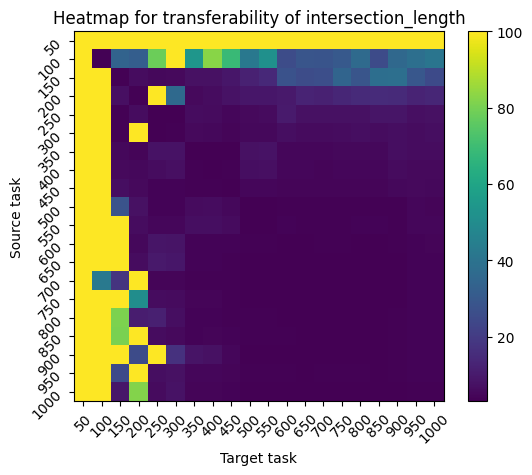

In [19]:
plt.imshow(reward_array, interpolation='none')
plt.colorbar(orientation='vertical')
plt.xticks(range(0,20),var_list, rotation=45)
plt.yticks(range(0,20),var_list, rotation=45)
plt.xlabel("Target task")
plt.ylabel("Source task")
plt.title(f"Heatmap for transferability of {DATA}")
plt.savefig(HOME+'/data/transfer_heatmap_'+DATA+'.png', bbox_inches="tight")

In [20]:
print(f"Train from scratch (in-distribution): {np.diag(reward_array).mean():.4f}")
print(f"Oracle training: {reward_array.min(axis=0).mean():.4f}")

Train from scratch (in-distribution): 8.3161
Oracle training: 8.2274


In [21]:
np.savetxt(HOME+'/data/'+DATA+'.csv', reward_array, delimiter=',')